In [ ]:
import time, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

!pip install scikit-learn
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from scipy import stats as stat_
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#%cd /content/drive/My Drive
%cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
%cd /content/drive/My Drive/ML Project/

/content/drive/My Drive/ML Project


In [ ]:
Data_Reading = pd.read_csv('terrorismdb_0522.csv',encoding = "ISO-8859-1", low_memory=False)

In [ ]:
Data_Reading.shape

(214666, 135)

In [ ]:
Data_Reading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214666 entries, 0 to 214665
Columns: 135 entries, ï»¿eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 221.1+ MB


In [ ]:
Data_Reading_copy = Data_Reading.copy()
Data_Reading_copy1 = Data_Reading.copy()

In [ ]:
count = 0
no_null = []
for i in Data_Reading.columns:
    data_col = Data_Reading[i]
    #print (i, " ",round((data_col.isnull().sum()/len(gt)*100), 4), gt[i].dtype)
    if data_col.isnull().sum()/len(Data_Reading)*100 < 10:
        count += 1
        no_null.append(i)

print(f'columns with less than 10% null values: {count}')


columns with less than 10% null values: 45


In [ ]:
Data_Reading_copy_new=Data_Reading_copy.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','approxdate':'Date','country_txt':'Country','success':'Success_rate','attacktype1_txt':'Attack_type','targtype1_txt':'Target','nkill':'Killed','weaptype1_txt':'Weapon_type','nwound':'Wounded','city':'City','gname':'Attacker'})

In [ ]:
Data_Reading_copy_new=Data_Reading_copy_new[['Year','Day','Month','Date','Country','City','Success_rate','Attack_type','Target','Killed','Wounded','Weapon_type','Attacker']]
Data_Reading_copy_new

,Year,Day,Month,Date,Country,City,Success_rate,Attack_type,Target,Killed,Wounded,Weapon_type,Attacker
0,1970,2,7,NaN,Dominican Republic,Santo Domingo,1,Assassination,Private Citizens & Property,1.0,0.0,Unknown,MANO-D
1,1970,0,0,NaN,Mexico,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,Unknown,23rd of September Communist League
2,1970,0,1,NaN,Philippines,Unknown,1,Assassination,Journalists & Media,1.0,0.0,Unknown,Unknown
3,1970,0,1,NaN,Greece,Athens,1,Bombing/Explosion,Government (Diplomatic),NaN,NaN,Explosives,Unknown
4,1970,0,1,NaN,Japan,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,Incendiary,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214661,2021,30,6,NaN,Afghanistan,Jangal Bagh,1,Bombing/Explosion,Utilities,0.0,0.0,Explosives,Unknown
214662,2021,30,6,06/30/2021,Myanmar,Muse,1,Hostage Taking (Kidnapping),Educational Institution,1.0,0.0,Unknown,Unknown
214663,2021,30,6,NaN,Nigeria,Unknown,1,Hostage Taking (Kidnapping),Religious Figures/Institutions,0.0,0.0,Firearms,Boko Haram
214664,2021,30,6,NaN,Colombia,Unknown,0,Bombing/Explosion,Unknown,0.0,0.0,Explosives,Revolutionary Armed Forces of Colombia (FARC) ...


In [ ]:
Data_Reading_copy_new.isnull().sum()

Year                 0
Day                  0
Month                0
Date            201593
Country              0
City               426
Success_rate         0
Attack_type          0
Target               0
Killed           12951
Wounded          20705
Weapon_type          0
Attacker             0
dtype: int64

In [ ]:
Data_Reading_copy_new.drop(columns="Date", inplace=True)

In [ ]:
Data_Reading_copy_new.isnull().sum()

Year                0
Day                 0
Month               0
Country             0
City              426
Success_rate        0
Attack_type         0
Target              0
Killed          12951
Wounded         20705
Weapon_type         0
Attacker            0
dtype: int64

In [ ]:
Data_Reading_copy_new.dropna(inplace=True)

In [ ]:
Data_Reading_copy_new.isnull().sum()

Year            0
Day             0
Month           0
Country         0
City            0
Success_rate    0
Attack_type     0
Target          0
Killed          0
Wounded         0
Weapon_type     0
Attacker        0
dtype: int64

In [ ]:
Data_Reading['casualities'] = (Data_Reading['nkill'] + Data_Reading['nwound'])  #add column for number of casualities = killed + wounded
Data_Reading['nclass'] = (Data_Reading.casualities.apply(lambda x: 0 if x == 0 else 1))  #create binary interpretation for casualities

In [ ]:
# Country-wise analysis of Terror Attacks and their destruction

def country_analysis(data , country=None , feature1=None , feature2=None , line_color=None , palette=None , title =None, start_year = None, end_year =None):
    filtered_data = data[(data['iyear'] >= start_year) & (data['iyear'] <= end_year)]
    plt.figure(figsize = (25,8))
    #Plot 1
    plt.subplot(1,2,1)
    custom_palette = sns.color_palette(['#FF5733', '#33FF57', '#334CFF'])
    sns.countplot(x = filtered_data.loc[filtered_data['country_txt'] == country]['city'] ,\
                  order = filtered_data.loc[filtered_data.country_txt == country].city.value_counts()[:5].index,\
                  data = filtered_data ,\
                  palette = "Set3")
    plt.xticks(rotation = 90)
    plt.title("Attacks count in different cities of %s" % (country), weight = 'bold' ,fontsize = 18 ,loc = 'center')
    plt.xlabel('City',fontsize = 20)
    plt.ylabel('Count',fontsize = 20)



    #Plot 3
    plt.subplot(1,2,2)
    filtered_data.query('country_txt == @country').groupby(['iyear'])['casualities'].sum().plot(xticks = filtered_data.loc[filtered_data.country_txt == country].groupby(['iyear'])['casualities'].sum().index, rot=90 , color = line_color , linewidth=5, marker='o', markersize=8)
    plt.title("Count of casualities from (2000 - 2021) in %s" % (country), fontdict = {'fontsize' : 18 , 'weight': 'bold' } , loc = 'center')
    plt.ylabel("Casualities" ,fontsize = 20)
    plt.xlabel('Year',fontsize = 20)

    plt.subplots_adjust(wspace = 1 ,hspace =0.5 ,top = 0.5 , bottom = 0.1)  # tune the subplot layout
    plt.tight_layout()   #to avoid overlapping of subplots and fit them cleanly in figure
    plt.show()



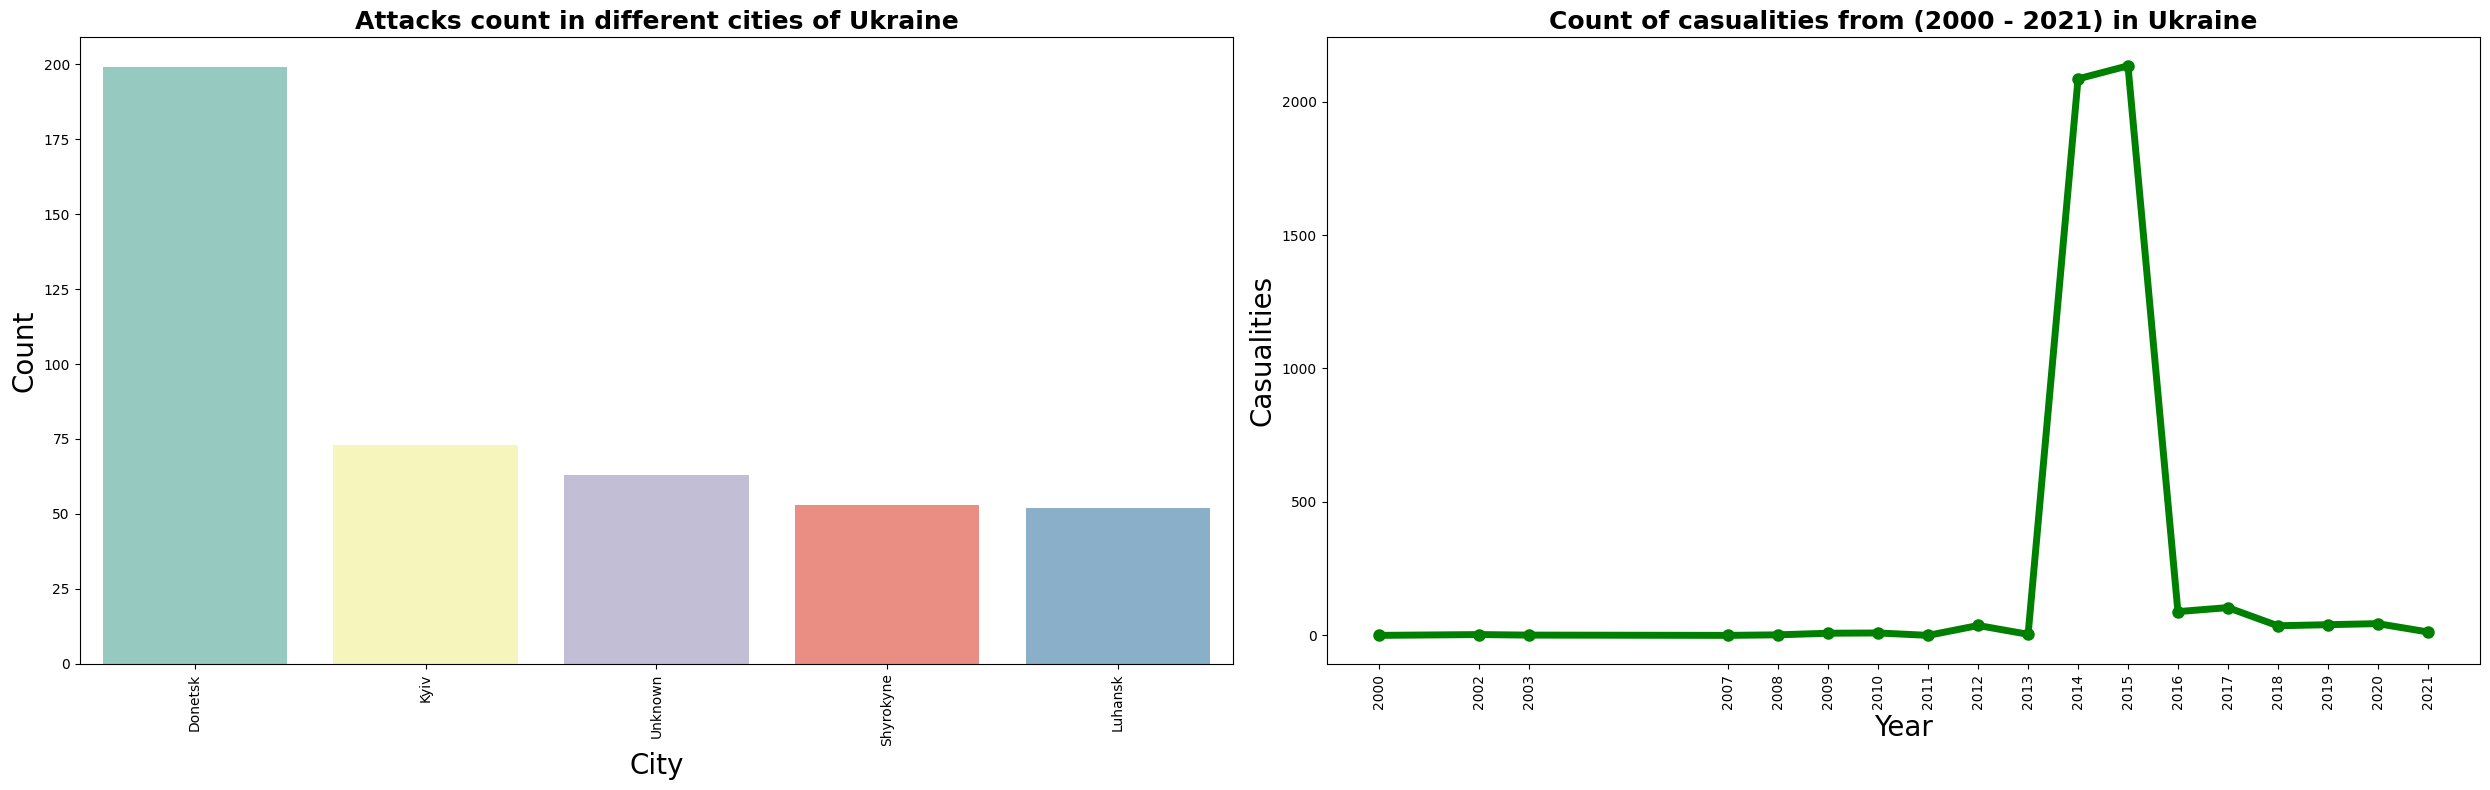

In [ ]:
country_analysis(Data_Reading, country= 'Ukraine', feature1= 'nkill' , feature2= 'attacktype1_txt' , line_color='green' , palette=None , title =None, start_year= 2000, end_year= 2021)

Text(0.5, 1.0, 'Distribution of attacks failure and success attempts')

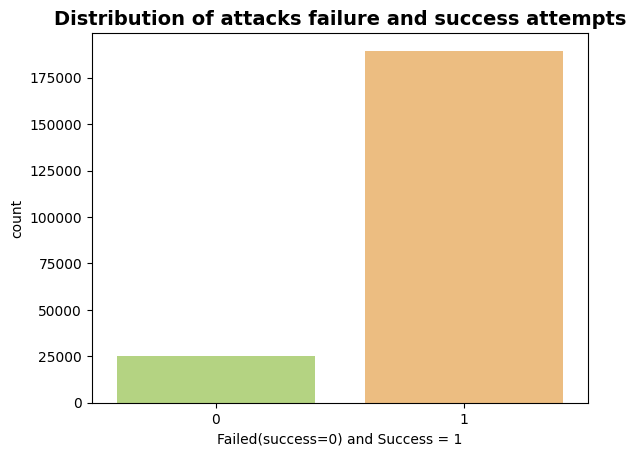

In [ ]:
custom_palette = sns.color_palette("RdYlGn", n_colors=2)
inverted_palette = custom_palette[::-1]
sns.countplot(x ='success', data = Data_Reading_copy, palette = inverted_palette)
plt.xlabel('Failed(success=0) and Success = 1')
plt.title('Distribution of attacks failure and success attempts',fontsize = 14, weight = 'bold', loc = 'center')

In [ ]:
sns.countplot(y ='attacktype1_txt', hue = 'success', data = Data_Reading_copy, palette = 'deep')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Different kinds of attack attempts and their distribution of Failure and Success',fontsize = 14, weight = 'bold', loc = 'center')

In [ ]:
custom_palette = sns.color_palette("Blues_r", n_colors=1) + sns.color_palette("Reds_r", n_colors=4)
sns.countplot(y ='targtype1_txt', hue = 'success', data = Data_Reading_copy, palette = custom_palette)
plt.title("Target Locations distribution based on their type",fontsize = 14, weight = 'bold', loc = 'center')
fig=plt.gcf()
fig.set_size_inches(10,8)

In [ ]:
custom_palette = sns.color_palette("YlOrBr_r", n_colors=1) + sns.color_palette("Purples_r", n_colors=4)
sns.countplot(x ='guncertain1', hue = 'success', data = Data_Reading_copy, palette = custom_palette)
plt.xlabel("Gun not used = 0.0 , Gun Used =1.0")
plt.title("Involvement of Gun Usage in attacks",fontsize = 14, weight = 'bold', loc = 'center')

In [ ]:
import pandas as pd

# Sample data (replace this with your actual dataset)
Data_Reading_copy = pd.DataFrame({
    'attacktype1_txt': ['Type1', 'Type2', 'Type1', 'Type2', 'Type1'],
    'success': [1, 0, 1, 1, 0],
    'Gun Used': [1, 0, 1, 0, 1]
})

# Calculate success rate for each group
success_rates = Data_Reading_copy.groupby('Gun Used')['success'].mean()

# Display the success rates
print(success_rates)

In [ ]:
sns.countplot(y ='weaptype1_txt', hue = 'success', data = Data_Reading_copy1)
plt.title('Usage of types of weapons in successful and Failed attempts',fontsize = 14, weight = 'bold', loc = 'center')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1 , squeeze = False , figsize =(20,10))
total = float(len(Data_Reading_copy1))
region_attacktype=pd.crosstab(Data_Reading_copy1.region_txt, Data_Reading_copy1.attacktype1_txt).plot(stacked=True,width=1,color=sns.color_palette('Set1',9),kind = 'barh' , ax = ax[0][0])
plt.title('Distribution of different kinds of attacks based on the regions we have in the data set', weight = 'bold')
plt.legend(fontsize = 12)

In [ ]:
fig=plt.gcf()
fig.set_size_inches(18,6)
sns.set()
sns.countplot(x= 'iyear', data= Data_Reading ,palette='Paired')
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Number Of Terrorist Activities Each Year', weight='bold')
plt.show()

In [ ]:
attacks_count = Data_Reading.gname.value_counts().to_frame().drop('Unknown').reset_index()[:20]
attacks_count.columns = ['Attacker', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=attacks_count['Attacker'], x=attacks_count['Total Attacks'], palette='RdYlGn_r')
plt.title('Number of attempts by Attackers', weight = 'bold')
plt.show()

In [ ]:
from seaborn.widgets import color_palette
terror_region  = pd.crosstab(Data_Reading_copy1.iyear , Data_Reading_copy1.region_txt )

terror_region.plot(colormap='Set2', linewidth=3, marker='o', markersize=8)
fig=plt.gcf()
fig.set_size_inches(25,10)
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.title("Terrorist attacks over years in different regions", weight = 'bold' ,fontsize = 18 ,loc = 'center')
plt.show()

In [ ]:
Data_Reading = Data_Reading.loc[:, ["iyear", "imonth", "iday", "extended","country_txt","vicinity","multiple","success","suicide","attacktype1_txt","targtype1_txt","target1",
         "crit1", "crit2","crit3","doubtterr","gname" ,"guncertain1","weaptype1_txt","nkill","nwound","property","ishostkid"]]

In [ ]:
Data_Reading = Data_Reading.loc[(Data_Reading['crit1'] == 1) & (Data_Reading['crit2'] == 1) & (Data_Reading['crit3'] == 1) & (Data_Reading['doubtterr'] == 0)]


In [ ]:
Data_Reading = Data_Reading.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','attacktype1_txt':'attack_type','targtype1_txt':'target_type',
                      'weaptype1_txt':'weapon_type','nkill':'killed','nwound':'wounded','gname':'attacker'})

In [ ]:
Data_Reading['casualities'] = (Data_Reading['killed'] + Data_Reading['wounded'])
Data_Reading['nclass'] = (Data_Reading['casualities'].apply(lambda x: 0 if x == 0 else 1))

In [ ]:
Data_Reading = Data_Reading[["year", "month", "day", "extended","country","vicinity","multiple","success","suicide","attack_type","target_type","target1",
         "attacker" ,"guncertain1","weapon_type","killed","wounded","casualities","nclass","property","ishostkid"]]

In [ ]:
Data_Reading = Data_Reading.apply(lambda x: x.fillna(0) if x.name in ['guncertain1', 'multiple', 'ishostkid'] else x, axis=0)
Data_Reading = Data_Reading.apply(lambda x: x.replace(-9, 0) if x.name in ['vicinity', 'property'] else x, axis=0)

fill_dict = {'target_type': 'Unknown', 'weapon_type': 'Unknown', 'attacker': 'Unknown', 'target1': 'unknown'}
Data_Reading = Data_Reading.fillna(value=fill_dict)
Data_Reading['target1'] = Data_Reading['target1'].replace('unk','unknown')

median_fill_cols = ['killed', 'wounded', 'casualities']
for col in median_fill_cols:
    Data_Reading[col] = np.round(Data_Reading[col].fillna(Data_Reading[col].median())).astype(int)


In [ ]:
cols_to_fillna = ['guncertain1', 'multiple', 'ishostkid']
Data_Reading[cols_to_fillna] = Data_Reading[cols_to_fillna].fillna(0)

cols_to_replace = ['vicinity', 'property']
Data_Reading[cols_to_replace] = Data_Reading[cols_to_replace].replace(-9, 0)

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()

cols_to_transform = ['country', 'attack_type', 'target_type', 'weapon_type', 'target1', 'attacker']

for col in cols_to_transform:
    Data_Reading[col] = lb.fit_transform(Data_Reading[col])

In [ ]:
country_values = [83, 132, 0, 79, 34, 137, 138, 186, 129, 177]
Data_Reading10 = Data_Reading[Data_Reading['country'].isin(country_values)]

In [ ]:
y = Data_Reading10.success

In [ ]:
X = Data_Reading10[["year", "month", "day", "extended","country","vicinity","multiple","suicide","attack_type","target_type",
         "target1","attacker" ,"guncertain1","weapon_type","killed","wounded","property","ishostkid", "casualities", "nclass"]]

Splitting Dataset

In [ ]:
Data_Reading_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192791 entries, 0 to 214665
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          192791 non-null  int64  
 1   Day           192791 non-null  int64  
 2   Month         192791 non-null  int64  
 3   Country       192791 non-null  object 
 4   City          192791 non-null  object 
 5   Success_rate  192791 non-null  int64  
 6   Attack_type   192791 non-null  object 
 7   Target        192791 non-null  object 
 8   Killed        192791 non-null  float64
 9   Wounded       192791 non-null  float64
 10  Weapon_type   192791 non-null  object 
 11  Attacker      192791 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 19.1+ MB


<ipython-input-42-3bead6384fc5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Data_Reading_copy_new[['Year','Day','Month','Country','City','Success_rate','Attack_type','Target','Killed','Wounded','Weapon_type','Attacker']].corr()


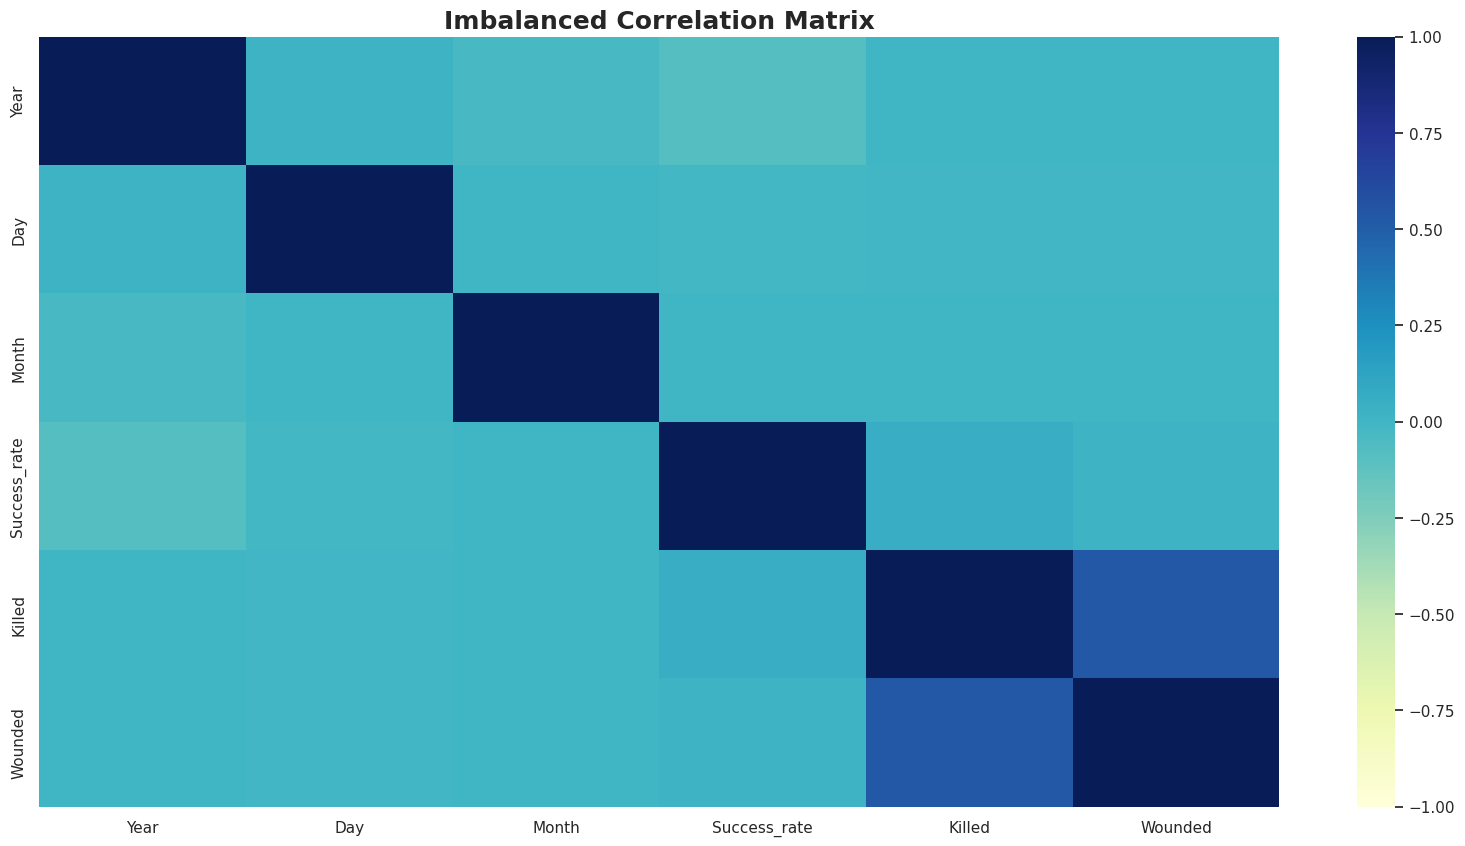

In [ ]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))

# Select numerical columns and calculate correlation
corr = Data_Reading_copy_new[['Year','Day','Month','Country','City','Success_rate','Attack_type','Target','Killed','Wounded','Weapon_type','Attacker']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax, vmax=1, vmin=-1)

# Set the title of the heatmap
ax.set_title("Imbalanced Correlation Matrix", fontsize=18, weight = 'bold')

# Display the figure
plt.show()

In [ ]:
Data_Reading2 = Data_Reading_copy_new.select_dtypes(np.number)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Initialize the DataFrame
vif_data = pd.DataFrame()

# Add the feature names
vif_data["feature"] = Data_Reading2.columns

# Calculate and add the VIF for each feature
vif = []
for i in range(Data_Reading2.shape[1]):
    vif.append(variance_inflation_factor(Data_Reading2.values, i))
vif_data["VIF"] = vif

# Print the DataFrame
print(vif_data)

        feature        VIF
0          Year  14.722601
1           Day   4.125666
2         Month   4.582517
3  Success_rate   8.055550
4        Killed   1.475686
5       Wounded   1.406061


In [ ]:
Data_Reading_copy_new.drop(columns="Year", inplace=True)

In [ ]:
Data_Reading3=Data_Reading_copy_new.select_dtypes("object")
Data_Reading3

,Country,City,Attack_type,Target,Weapon_type,Attacker
0,Dominican Republic,Santo Domingo,Assassination,Private Citizens & Property,Unknown,MANO-D
1,Mexico,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League
2,Philippines,Unknown,Assassination,Journalists & Media,Unknown,Unknown
5,United States,Cairo,Armed Assault,Police,Firearms,Black Nationalists
6,Uruguay,Montevideo,Assassination,Police,Firearms,Tupamaros (Uruguay)
...,...,...,...,...,...,...
214661,Afghanistan,Jangal Bagh,Bombing/Explosion,Utilities,Explosives,Unknown
214662,Myanmar,Muse,Hostage Taking (Kidnapping),Educational Institution,Unknown,Unknown
214663,Nigeria,Unknown,Hostage Taking (Kidnapping),Religious Figures/Institutions,Firearms,Boko Haram
214664,Colombia,Unknown,Bombing/Explosion,Unknown,Explosives,Revolutionary Armed Forces of Colombia (FARC) ...


In [ ]:
def replace_non_top_10_values_with_others(x):
    top_10 = x.value_counts().head(10).index
    return x.apply(lambda y: y if y in top_10 else 'others')

Data_Reading3 = Data_Reading3.apply(replace_non_top_10_values_with_others)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first')

# Fit and transform the data
Data_Reading3_en = encoder.fit_transform(Data_Reading3)

# Convert the result to a DataFrame
Data_Reading3_en = pd.DataFrame(Data_Reading3_en.toarray(), columns=encoder.get_feature_names_out(Data_Reading3.columns))

In [ ]:
Data_Reading3_en

,Country_Colombia,Country_India,Country_Iraq,Country_Nigeria,Country_Pakistan,Country_Peru,Country_Philippines,Country_Turkey,Country_Yemen,Country_others,...,Attacker_Boko Haram,Attacker_Farabundo Marti National Liberation Front (FMLN),Attacker_Houthi extremists (Ansar Allah),Attacker_Islamic State of Iraq and the Levant (ISIL),Attacker_Kurdistan Workers' Party (PKK),Attacker_New People's Army (NPA),Attacker_Shining Path (SL),Attacker_Taliban,Attacker_Unknown,Attacker_others
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
192787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
192788,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192789,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
Data_Reading2

,Year,Day,Month,Success_rate,Killed,Wounded
0,1970,2,7,1,1.0,0.0
1,1970,0,0,1,0.0,0.0
2,1970,0,1,1,1.0,0.0
5,1970,1,1,1,0.0,0.0
6,1970,2,1,0,0.0,0.0
...,...,...,...,...,...,...
214661,2021,30,6,1,0.0,0.0
214662,2021,30,6,1,1.0,0.0
214663,2021,30,6,1,0.0,0.0
214664,2021,30,6,0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Data_Reading2_sc = pd.DataFrame(sc.fit_transform(Data_Reading2.drop(columns ="Success_rate")),
                         columns=Data_Reading2.drop(columns ="Success_rate").columns,
                         index=Data_Reading2.drop(columns ="Success_rate").index)

In [ ]:
Data_Reading_final = pd.concat([Data_Reading2_sc, Data_Reading3_en, Data_Reading2['Success_rate']], axis=1)

In [ ]:
Data_Reading_final

,Year,Day,Month,Killed,Wounded,Country_Colombia,Country_India,Country_Iraq,Country_Nigeria,Country_Pakistan,...,Attacker_Farabundo Marti National Liberation Front (FMLN),Attacker_Houthi extremists (Ansar Allah),Attacker_Islamic State of Iraq and the Levant (ISIL),Attacker_Kurdistan Workers' Party (PKK),Attacker_New People's Army (NPA),Attacker_Shining Path (SL),Attacker_Taliban,Attacker_Unknown,Attacker_others,Success_rate
0,-2.710963,-1.540029,0.175142,-0.122482,-0.075442,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-2.710963,-1.767434,-1.893642,-0.228880,-0.075442,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,-2.710963,-1.767434,-1.598102,-0.122482,-0.075442,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,-2.710963,-1.653731,-1.598102,-0.228880,-0.075442,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,-2.710963,-1.540029,-1.598102,-0.228880,-0.075442,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192757,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
192760,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
192776,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
192779,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN


In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE()

# Drop NaN values from the entire dataframe
Data_Reading_final = Data_Reading_final.dropna()

# Define features and target
features = Data_Reading_final.drop(columns='Success_rate')
target = Data_Reading_final['Success_rate']

# Apply SMOTE
X, y = sm.fit_resample(features, target)

<Axes: ylabel='count'>

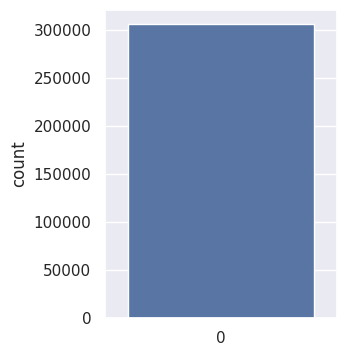

In [ ]:
plt.figure(figsize=(3,4))
sns.countplot(y)

In [ ]:
Data_Reading10

,year,month,day,extended,country,vicinity,multiple,success,suicide,attack_type,...,target1,attacker,guncertain1,weapon_type,killed,wounded,casualities,nclass,property,ishostkid
2,1970,1,0,0,138,0,0.0,1,0,1,...,23973,3204,0.0,10,1,0,1,1,0,0.0
5,1970,1,1,0,186,0,0.0,1,0,0,...,12518,639,0.0,4,0,0,0,0,1,0.0
8,1970,1,2,0,186,0,0.0,1,0,3,...,50473,2112,0.0,5,0,0,0,0,1,0.0
9,1970,1,3,0,186,0,0.0,1,0,3,...,55210,2112,0.0,5,0,0,0,0,1,0.0
13,1970,1,9,0,186,0,0.0,1,0,3,...,45506,1712,0.0,5,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214656,2021,6,30,0,34,0,1.0,1,0,0,...,47588,2037,1.0,2,0,0,0,0,1,0.0
214660,2021,6,30,0,83,0,0.0,1,0,0,...,34533,1437,0.0,4,0,2,1,1,0,0.0
214661,2021,6,30,0,0,0,0.0,1,0,2,...,23691,3204,0.0,2,0,0,0,0,1,0.0
214663,2021,6,30,1,129,0,0.0,1,0,6,...,53295,663,0.0,4,0,0,0,0,0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting Data
X = Data_Reading10.drop(columns='success')
y = Data_Reading10['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Define features and target
X_train = Data_Reading10.drop(['success'], axis=1)
y_train = Data_Reading10['success']

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create an object of the classifier
rfc = RandomForestClassifier(random_state=0)

# Train the classifier
rfc.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
preds = rfc.predict(X_test)

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (90995, 20)
y_train shape:  (90995,)
X_test shape:  (18199, 20)
y_test shape:  (18199,)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

def doLogisticRegression(X, y, normalize=False):
  # If normalize option is enabled,
  if normalize:
    # Initialize the StandardScaler
    sc = StandardScaler()

    # Fit and transform the data
    X = sc.fit_transform(X)

  # Instantiate an object from Logistic Regression class.
  lr = LogisticRegression()

  # Perform training and prediction.
  lr.fit(X, y)
  y_pred_lr = lr.predict(X)

  # Return training accuracy and confusion matrix.
  return accuracy_score(y, y_pred_lr), confusion_matrix(y, y_pred_lr), lr

TrainAcc, TrainConf, LR = doLogisticRegression(X_train, y_train, normalize=True)
print(TrainAcc)
print(TrainConf)

0.9231825924501347
[[ 6051  5014]
 [ 1976 77954]]


In [ ]:
from sklearn.metrics import classification_report


# Make predictions on the test data
y_test_pred = LR.predict(X_test)

# Calculate accuracy and confusion matrix
TestAcc = accuracy_score(y_test, y_test_pred)
TestConf = confusion_matrix(y_test, y_test_pred)

# Print accuracy and confusion matrix
print("Test Accuracy: ", TestAcc)
print("Test Confusion Matrix: \n", TestConf)

# Calculate and print classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report: \n", report)

Test Accuracy:  0.12072091873179845
Test Confusion Matrix: 
 [[ 2197     0]
 [16002     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.12      1.00      0.22      2197
           1       0.00      0.00      0.00     16002

    accuracy                           0.12     18199
   macro avg       0.06      0.50      0.11     18199
weighted avg       0.01      0.12      0.03     18199



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [ ]:
 roc_auc_score(y_test, y_test_pred)

0.5

In [ ]:
!pip install --upgrade scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


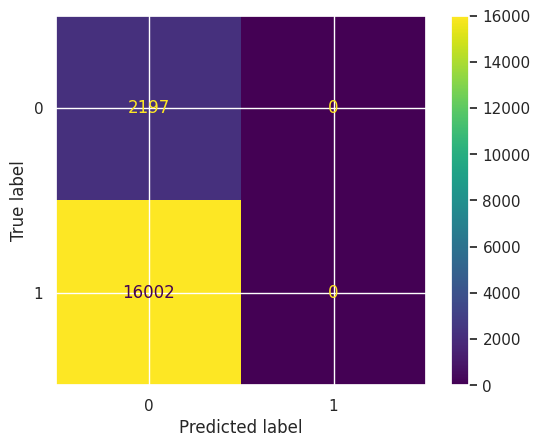

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test are your true labels and y_pred are your predicted labels
y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.12      1.00      0.22      2197
           1       0.00      0.00      0.00     16002

    accuracy                           0.12     18199
   macro avg       0.06      0.50      0.11     18199
weighted avg       0.01      0.12      0.03     18199



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


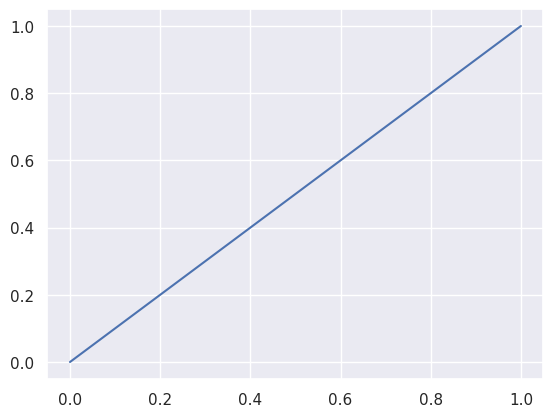

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr,tpr)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Defining the parameter grid
param_distributions = {
    "C": np.logspace(0.5, 1, 10, 100),
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["newton-cg", "lbfgs"],
    "max_iter": [100, 500, 1000]
}

# Creating the base model
LR = LogisticRegression()

# Using randomizedsearchcv with cross validation=5
LR_random = RandomizedSearchCV(
    estimator=LR,
    param_distributions=param_distributions,
    cv=5,
    scoring='roc_auc',
    refit=True,
    verbose=3,
    n_iter=100,  # Number of parameter settings that are sampled
    random_state=42  # For reproducibility
)

# Fitting the model
LR_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=3.5938136638046276, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3.5938136638046276, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3.5938136638046276, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3.5938136638046276, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3.5938136638046276, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=4.084238652674522, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=4.084238652674522, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=4.084238652674522, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=4.084238652674522, max_iter=500, penalty=l1, solver=newton-cg;, score=nan

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 2/5] END C=3.1622776601683795, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.853 total time=  10.0s
[CV 3/5] END C=3.1622776601683795, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.9s
[CV 4/5] END C=3.1622776601683795, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.814 total time=   1.0s
[CV 5/5] END C=3.1622776601683795, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.745 total time=   6.1s
[CV 1/5] END C=3.5938136638046276, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3.5938136638046276, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3.5938136638046276, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=3.5938136638046276, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=3.5938136638046276, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=4.641588833612778, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.786 total time=  30.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=4.641588833612778, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.854 total time=  23.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=4.641588833612778, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.888 total time=  24.1s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=4.641588833612778, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.885 total time=  23.4s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=4.641588833612778, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.832 total time=  28.0s
[CV 1/5] END C=6.812920690579611, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=6.812920690579611, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=6.812920690579611, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=6.812920690579611, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=6.812920690579611, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=6.812920690579611, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=6.812920690579611, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=6.812920690579611, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 5/5] END C=5.99484250318941, max_iter=100, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.9s
[CV 1/5] END C=8.79922543569107, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.560 total time=   0.6s
[CV 2/5] END C=8.79922543569107, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.9s
[CV 3/5] END C=8.79922543569107, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.5s
[CV 4/5] END C=8.79922543569107, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.6s
[CV 5/5] END C=8.79922543569107, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.739 total time=   1.0s
[CV 1/5] END C=4.641588833612778, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.560 total time=   0.7s
[CV 2/5] END C=4.641588833612778, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.8s
[CV 3/5] END C=4.641588833612778, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.5s
[CV 4/5] END C=4.641588833612778, max_iter=1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 2/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=lbfgs;, score=0.848 total time=   8.1s
[CV 3/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.5s
[CV 4/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.6s
[CV 5/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=lbfgs;, score=0.742 total time=   3.4s
[CV 1/5] END C=3.1622776601683795, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3.1622776601683795, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3.1622776601683795, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=3.1622776601683795, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=3.1622776601683795, max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 2/5] END C=4.084238652674522, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.851 total time=  13.2s
[CV 3/5] END C=4.084238652674522, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.6s
[CV 4/5] END C=4.084238652674522, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.6s
[CV 5/5] END C=4.084238652674522, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.742 total time=   3.5s
[CV 1/5] END C=6.812920690579611, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=6.812920690579611, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=6.812920690579611, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=6.812920690579611, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=6.812920690579611, max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 1/5] END C=4.641588833612778, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 2/5] END C=4.641588833612778, max_iter=100, penalty=l2, solver=newton-cg;, score=0.850 total time=  10.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 3/5] END C=4.641588833612778, max_iter=100, penalty=l2, solver=newton-cg;, score=0.885 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 4/5] END C=4.641588833612778, max_iter=100, penalty=l2, solver=newton-cg;, score=0.883 total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 5/5] END C=4.641588833612778, max_iter=100, penalty=l2, solver=newton-cg;, score=0.825 total time=  19.8s
[CV 1/5] END C=5.99484250318941, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5.99484250318941, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5.99484250318941, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5.99484250318941, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5.99484250318941, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=6.812920690579611, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=6.812920690579611, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=6.812920690579611, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=6.812920690579611, max_iter=1000,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 2/5] END C=3.1622776601683795, max_iter=500, penalty=l2, solver=lbfgs;, score=0.842 total time=  13.5s
[CV 3/5] END C=3.1622776601683795, max_iter=500, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.8s
[CV 4/5] END C=3.1622776601683795, max_iter=500, penalty=l2, solver=lbfgs;, score=0.814 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 5/5] END C=3.1622776601683795, max_iter=500, penalty=l2, solver=lbfgs;, score=0.735 total time=   8.7s
[CV 1/5] END C=10.0, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=4.641588833612778, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=4.641588833612778, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=4.641588833612778, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=4.641588833612778, max_iter=500, penalt

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=7.742636826811269, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.783 total time=  31.6s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=7.742636826811269, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.854 total time=  33.9s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=7.742636826811269, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.888 total time=  37.5s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=7.742636826811269, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.885 total time=  51.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=7.742636826811269, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.832 total time=  30.9s
[CV 1/5] END C=7.742636826811269, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=7.742636826811269, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=7.742636826811269, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=7.742636826811269, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=7.742636826811269, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=4.641588833612778, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=4.641588833612778, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=4.641588833612778, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=4.64158

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 1/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 2/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=newton-cg;, score=0.850 total time=  10.9s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 3/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=newton-cg;, score=0.885 total time=   5.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 4/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=newton-cg;, score=0.882 total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 5/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=newton-cg;, score=0.825 total time=   7.3s
[CV 1/5] END C=10.0, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=6.812920690579611, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=6.812920690579611, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=6.812920690579611, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=6.812920690579611, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=6.81

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 1/5] END C=3.1622776601683795, max_iter=100, penalty=l2, solver=newton-cg;, score=0.734 total time=  10.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 2/5] END C=3.1622776601683795, max_iter=100, penalty=l2, solver=newton-cg;, score=0.851 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 3/5] END C=3.1622776601683795, max_iter=100, penalty=l2, solver=newton-cg;, score=0.885 total time=   9.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 4/5] END C=3.1622776601683795, max_iter=100, penalty=l2, solver=newton-cg;, score=0.880 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 5/5] END C=3.1622776601683795, max_iter=100, penalty=l2, solver=newton-cg;, score=0.825 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.786 total time=  31.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.854 total time=  23.1s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.888 total time=  27.9s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.885 total time=  24.2s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=10.0, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.832 total time=  31.5s
[CV 1/5] END C=4.084238652674522, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=4.084238652674522, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=4.084238652674522, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=4.084238652674522, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=4.084238652674522, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=5.274997063702618, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5.274997063702618, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5.274997063702618, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=8.79922543569107, max_iter=500, penalty=l2, solver=newton-cg;, score=0.786 total time=  40.9s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=8.79922543569107, max_iter=500, penalty=l2, solver=newton-cg;, score=0.854 total time=  20.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=8.79922543569107, max_iter=500, penalty=l2, solver=newton-cg;, score=0.888 total time=  22.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=8.79922543569107, max_iter=500, penalty=l2, solver=newton-cg;, score=0.885 total time=  28.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=8.79922543569107, max_iter=500, penalty=l2, solver=newton-cg;, score=0.832 total time=  24.9s
[CV 1/5] END C=5.274997063702618, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=5.274997063702618, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=5.274997063702618, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=5.274997063702618, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=5.274997063702618, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=lbfgs;, score=0.560 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 2/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.8s
[CV 3/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.5s
[CV 4/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 5/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=lbfgs;, score=0.739 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=3.5938136638046276, max_iter=500, penalty=l2, solver=newton-cg;, score=0.786 total time=  35.4s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=3.5938136638046276, max_iter=500, penalty=l2, solver=newton-cg;, score=0.854 total time=  25.1s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=3.5938136638046276, max_iter=500, penalty=l2, solver=newton-cg;, score=0.888 total time=  27.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=3.5938136638046276, max_iter=500, penalty=l2, solver=newton-cg;, score=0.885 total time=  22.1s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=3.5938136638046276, max_iter=500, penalty=l2, solver=newton-cg;, score=0.832 total time=  32.3s
[CV 1/5] END C=8.79922543569107, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=8.79922543569107, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=8.79922543569107, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=8.79922543569107, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=8.79922543569107, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=5.99484250318941, max_iter=500, penalty=l2, solver=newton-cg;, score=0.786 total time=  36.7s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=5.99484250318941, max_iter=500, penalty=l2, solver=newton-cg;, score=0.854 total time=  21.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=5.99484250318941, max_iter=500, penalty=l2, solver=newton-cg;, score=0.888 total time=  26.9s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=5.99484250318941, max_iter=500, penalty=l2, solver=newton-cg;, score=0.885 total time=  22.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=5.99484250318941, max_iter=500, penalty=l2, solver=newton-cg;, score=0.832 total time=  24.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 1/5] END C=6.812920690579611, max_iter=100, penalty=l2, solver=lbfgs;, score=0.561 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 2/5] END C=6.812920690579611, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   1.6s
[CV 3/5] END C=6.812920690579611, max_iter=100, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.5s
[CV 4/5] END C=6.812920690579611, max_iter=100, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 5/5] END C=6.812920690579611, max_iter=100, penalty=l2, solver=lbfgs;, score=0.741 total time=   0.9s
[CV 1/5] END C=5.274997063702618, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=5.274997063702618, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=5.274997063702618, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=5.274997063702618, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=5.274997063702618, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=4.084238652674522, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=4.084238652674522, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=4.084238652674522, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total tim

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 1/5] END C=10.0, max_iter=100, penalty=l2, solver=newton-cg;, score=0.732 total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 2/5] END C=10.0, max_iter=100, penalty=l2, solver=newton-cg;, score=0.850 total time=   9.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 3/5] END C=10.0, max_iter=100, penalty=l2, solver=newton-cg;, score=0.885 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 4/5] END C=10.0, max_iter=100, penalty=l2, solver=newton-cg;, score=0.882 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 5/5] END C=10.0, max_iter=100, penalty=l2, solver=newton-cg;, score=0.823 total time=  10.0s
[CV 1/5] END C=3.5938136638046276, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3.5938136638046276, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3.5938136638046276, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=3.5938136638046276, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=3.5938136638046276, max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=5.99484250318941, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.786 total time=  37.4s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=5.99484250318941, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.854 total time=  20.9s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=5.99484250318941, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.888 total time=  28.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=5.99484250318941, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.885 total time=  26.2s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=5.99484250318941, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.832 total time=  22.3s
[CV 1/5] END C=5.274997063702618, max_iter=100, penalty=l2, solver=lbfgs;, score=0.560 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 2/5] END C=5.274997063702618, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   1.0s
[CV 3/5] END C=5.274997063702618, max_iter=100, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.5s
[CV 4/5] END C=5.274997063702618, max_iter=100, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 5/5] END C=5.274997063702618, max_iter=100, penalty=l2, solver=lbfgs;, score=0.742 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 1/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 2/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=newton-cg;, score=0.850 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 3/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=newton-cg;, score=0.885 total time=  14.1s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 4/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=newton-cg;, score=0.882 total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 5/5] END C=8.79922543569107, max_iter=100, penalty=l2, solver=newton-cg;, score=0.825 total time=   9.8s
[CV 1/5] END C=3.1622776601683795, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3.1622776601683795, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3.1622776601683795, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3.1622776601683795, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3.1622776601683795, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=3.1622776601683795, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3.1622776601683795, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3.1622776601683795, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=3.5938136638046276, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.786 total time=  34.2s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=3.5938136638046276, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.854 total time=  24.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=3.5938136638046276, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.888 total time=  27.4s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=3.5938136638046276, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.885 total time=  21.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=3.5938136638046276, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.832 total time=  26.6s
[CV 1/5] END C=5.99484250318941, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5.99484250318941, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5.99484250318941, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5.99484250318941, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5.99484250318941, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 1/5] END C=7.742636826811269, max_iter=100, penalty=l2, solver=newton-cg;, score=0.733 total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 2/5] END C=7.742636826811269, max_iter=100, penalty=l2, solver=newton-cg;, score=0.850 total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 3/5] END C=7.742636826811269, max_iter=100, penalty=l2, solver=newton-cg;, score=0.885 total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 4/5] END C=7.742636826811269, max_iter=100, penalty=l2, solver=newton-cg;, score=0.882 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  if warn and k >= maxiter:


[CV 5/5] END C=7.742636826811269, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   5.1s
[CV 1/5] END C=5.99484250318941, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5.99484250318941, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5.99484250318941, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5.99484250318941, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5.99484250318941, max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=3.1622776601683795, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3.1622776601683795, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3.1622776601683795, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan tot

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 1/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=newton-cg;, score=0.786 total time=  33.6s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 2/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=newton-cg;, score=0.854 total time=  24.3s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 3/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=newton-cg;, score=0.888 total time=  28.7s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 4/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=newton-cg;, score=0.885 total time=  27.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


[CV 5/5] END C=4.084238652674522, max_iter=500, penalty=l2, solver=newton-cg;, score=0.832 total time=  23.6s
[CV 1/5] END C=6.812920690579611, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.561 total time=   1.6s
[CV 2/5] END C=6.812920690579611, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.843 total time=   6.0s
[CV 3/5] END C=6.812920690579611, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.795 total time=   0.4s
[CV 4/5] END C=6.812920690579611, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.5s
[CV 5/5] END C=6.812920690579611, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.744 total time=   2.8s
[CV 1/5] END C=3.5938136638046276, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3.5938136638046276, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3.5938136638046276, max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[CV 2/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   1.9s
[CV 3/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=lbfgs;, score=0.795 total time=   1.2s
[CV 4/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=lbfgs;, score=0.814 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
340 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with

[CV 5/5] END C=4.084238652674522, max_iter=100, penalty=l2, solver=lbfgs;, score=0.738 total time=   0.9s
[CV 1/5] END C=6.812920690579611, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=6.812920690579611, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=6.812920690579611, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=6.812920690579611, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=6.812920690579611, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  except _LineSearchError:


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([ 3.16227766,  3.59381366,  4.08423865,  4.64158883,  5.27499706,
        5.9948425 ,  6.81292069,  7.74263683,  8.79922544, 10.        ]),
                                        'max_iter': [100, 500, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs']},
                   random_state=42, scoring='roc_auc', verbose=3)

In [ ]:
LR_random.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 1000, 'C': 10.0}

In [ ]:
LRTuned=LR_random.best_estimator_.predict(X_test)

In [ ]:
roc_auc_score(y_test, LRTuned)

0.7663174016083675

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)

In [ ]:
pred = knn_model.predict(X_test)

In [ ]:
roc_auc_score(y_test,pred)

0.7474695214759511

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.51      0.63      2197
           1       0.94      0.98      0.96     16002

    accuracy                           0.93     18199
   macro avg       0.87      0.75      0.79     18199
weighted avg       0.92      0.93      0.92     18199



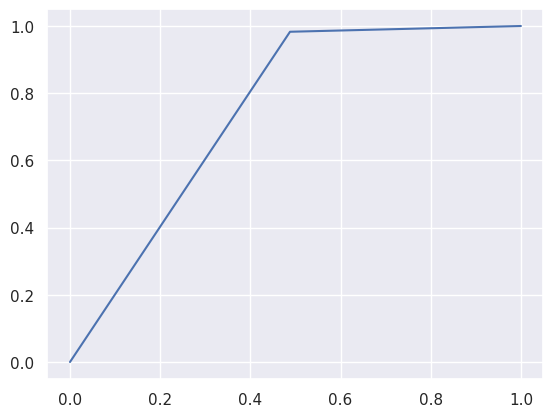

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)

In [ ]:
param_grid = {'weights':['uniform', 'distance'],
              'n_neighbors':[3,5]}

knn = KNeighborsClassifier()
#using gridsearchcv with cross validation=5
knn_grid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc', refit = True, verbose = 3)
# Fitting the model
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.514 total time=  11.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.467 total time=   6.7s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.748 total time=  10.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.800 total time=   7.8s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.729 total time=   8.3s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.514 total time=   9.5s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.462 total time=   6.7s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.741 total time=  11.1s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.801 total time=   6.7s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.731 total time=  10.6s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.512 total time=   7.2s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=3)

In [ ]:
knn_grid.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_best = knn.fit(X_train, y_train)
ypred_knn = knn_best.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
roc_auc_score(y_test, pred)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, ypred_knn)

In [ ]:
plt.plot(fpr, tpr)